# Facebook Prophet Basics

Facebook's Prophet Forecasting Library specifically designed to forecast the business data sets that are common at facebook (eg--Daily, Minute,Large data sets)

At its core, the Prophet procedure is an additive regression model with 4 main components:
* A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data
* A yearly seasonal component modeled using fourier series.
* A weekly seasonal component using dummy variables
* A user provided list of important holidays


https://facebook.github.io/prophet/docs/installation.html#python 

### Load Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet

### Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
df = pd.read_csv('/content/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [4]:
#Need to change the column names to 'ds' and 'y', otherwise it will not work
df.columns = ['ds','y']

In [5]:
#Changing 'ds' column type to datetime
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [6]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [7]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [8]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [10]:
len(df)

324

In [11]:
len(future)

348


### Step 2: Predict and fill in the Future

In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1156.188162,1473.798241,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1190.765196,1518.936442,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1451.778740,1762.992080,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1423.517650,1748.349222,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1668.579248,2005.270668,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.687845,5075.544728,5406.006240,5186.894115,5212.390914,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4909.258281,5246.702523,5201.767341,5229.440851,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5027.317597,5353.442509,5216.500095,5246.110248,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5171.836423,5505.050410,5231.083511,5263.526424,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749
347,2020-12-01,5263.906554,6171.543277,6506.822087,5245.499317,5280.291234,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,0.0,0.0,0.0,6334.440008


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.559148,4468.901726,4790.574083
337,2020-02-01,4679.231311,4506.754587,4838.556245
338,2020-03-01,4942.493052,4789.196823,5095.660041
339,2020-04-01,4941.412350,4781.150220,5108.579440
340,2020-05-01,5198.212046,5048.798338,5351.879439
341,2020-06-01,5178.840512,5008.766671,5340.119588
342,2020-07-01,5311.075537,5145.646613,5479.474473
343,2020-08-01,5240.612763,5075.544728,5406.006240
344,2020-09-01,5083.379410,4909.258281,5246.702523
345,2020-10-01,5188.922115,5027.317597,5353.442509


### Plotting Forecast

We can use Prophet's own built in plotting tools

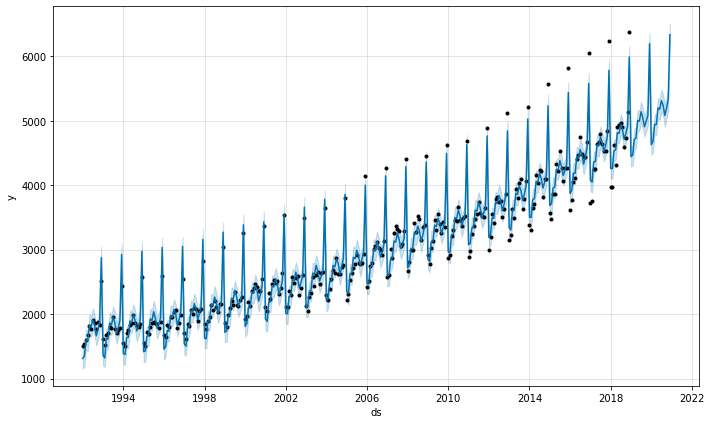

In [17]:
m.plot(forecast);

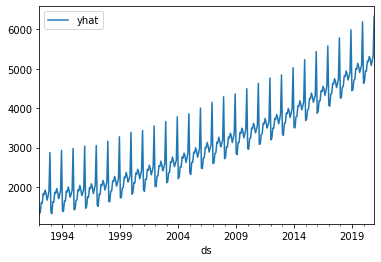

In [23]:
forecast.plot(x='ds',y='yhat')

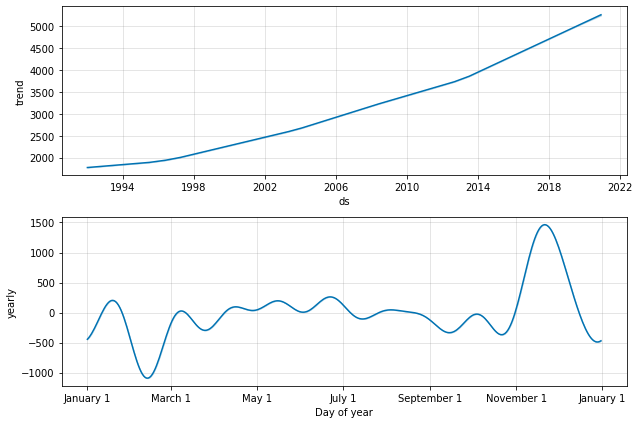

In [25]:
m.plot_components(forecast);